In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análise Exploratória  ÓBITOS POR DOENÇAS CRÔNICAS NÃO TRANSMISSÍVEIS - DCNT do estado de Minas Gerais no ano de 2022

---
LINK PARA O BANCO DE DADOS:
https://dados.gov.br/dados/conjuntos-dados/dados_doencas_cronicas_ses#:~:text=O%20banco%20de%20dados%20de,jur%C3%ADdica%20pelo%20preenchimento%20e%20pela

*  O banco de dados de Doenças Crônicas Não Transmissíveis (DCNT) contempla os registros de óbitos, inseridos no Sistema de Informação sobre Mortalidade (SIM), que é alimentado, pelo setor saúde, com informações contidas na Declaração de Óbito (DO).



*  Os dados foram extraídos do SIM por meio do tabulador de informações em saúde Tabnet da Secretaria de Estado de Saúde de Minas Gerais (SES-MG), com a seleção dos óbitos por DCNT.

In [ ]:
!pip install columns

In [ ]:
import columns

In [ ]:
import warnings
warnings.filterwarnings('ignore')
SEED = 123

In [ ]:
pd.set_option('display.colheader_justify','right')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_rows',200)

In [ ]:
df = pd.read_csv('dados_cronicas_ses_2022.csv' , sep = ';')

### VISUALIZANDO O BANCO DE DADOS

---



In [ ]:
df.head(5)

,dt_obito,dt_nascimento,nu_idade,sg_sexo,tp_raca_cor,tp_escolaridade,co_municipio_ibge_residencia,co_municipio_ibge_ocorrencia,co_cid_causa_basica,desc_cid_causa_basica,capitulo_cid_causa_basica,categoria_cid_causa_basica
0,01/01/2022,05/03/1942,79.0,Feminino,Branca,de 4 a 7 anos,Belo Horizonte,Belo Horizonte,C069,BOCA NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG OUTR PARTES E PARTES NE DA BOCA
1,01/01/2022,14/08/1969,52.0,Masculino,Branca,de 1 a 3 anos,Itatiaiuçu,Itatiaiuçu,C069,BOCA NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG OUTR PARTES E PARTES NE DA BOCA
2,01/01/2022,23/08/1947,74.0,Masculino,Branca,de 8 a 11 anos,Nanuque,Nanuque,C169,ESTOMAGO NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG DO ESTOMAGO
3,01/01/2022,19/07/1968,53.0,Masculino,Parda,de 4 a 7 anos,Ribeirão das Neves,Ribeirão das Neves,C169,ESTOMAGO NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG DO ESTOMAGO
4,01/01/2022,28/03/1946,75.0,Feminino,Parda,Ignorado,Belo Horizonte,Belo Horizonte,C169,ESTOMAGO NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG DO ESTOMAGO


In [ ]:
df1 = df.rename(columns={'nu_idade': 'Idade','sg_sexo': 'Sexo','tp_raca_cor': 'Raça/Cor','tp_escolaridade': 'Escolaridade', }) #RENOMEANDO COLUNAS
df1.head(5)

,dt_obito,dt_nascimento,Idade,Sexo,Raça/Cor,Escolaridade,co_municipio_ibge_residencia,co_municipio_ibge_ocorrencia,co_cid_causa_basica,desc_cid_causa_basica,capitulo_cid_causa_basica,categoria_cid_causa_basica
0,01/01/2022,05/03/1942,79.0,Feminino,Branca,de 4 a 7 anos,Belo Horizonte,Belo Horizonte,C069,BOCA NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG OUTR PARTES E PARTES NE DA BOCA
1,01/01/2022,14/08/1969,52.0,Masculino,Branca,de 1 a 3 anos,Itatiaiuçu,Itatiaiuçu,C069,BOCA NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG OUTR PARTES E PARTES NE DA BOCA
2,01/01/2022,23/08/1947,74.0,Masculino,Branca,de 8 a 11 anos,Nanuque,Nanuque,C169,ESTOMAGO NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG DO ESTOMAGO
3,01/01/2022,19/07/1968,53.0,Masculino,Parda,de 4 a 7 anos,Ribeirão das Neves,Ribeirão das Neves,C169,ESTOMAGO NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG DO ESTOMAGO
4,01/01/2022,28/03/1946,75.0,Feminino,Parda,Ignorado,Belo Horizonte,Belo Horizonte,C169,ESTOMAGO NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG DO ESTOMAGO


### TAMANHO DA BASE :

---



In [ ]:
df.shape
print(f"Total de registros: {df.shape[0]}")
print(f"Total de variáveis: {df.shape[1]}")

Total de registros: 82292
Total de variáveis: 12


### VARIÁVEIS PRESENTE NA BASE

---



In [ ]:
list(df1)

['dt_obito',
 'dt_nascimento',
 'Idade',
 'Sexo',
 'Raça/Cor',
 'Escolaridade',
 'co_municipio_ibge_residencia',
 'co_municipio_ibge_ocorrencia',
 'co_cid_causa_basica',
 'desc_cid_causa_basica',
 'capitulo_cid_causa_basica',
 'categoria_cid_causa_basica']

### OBITOS  POR DIA /  2022

---



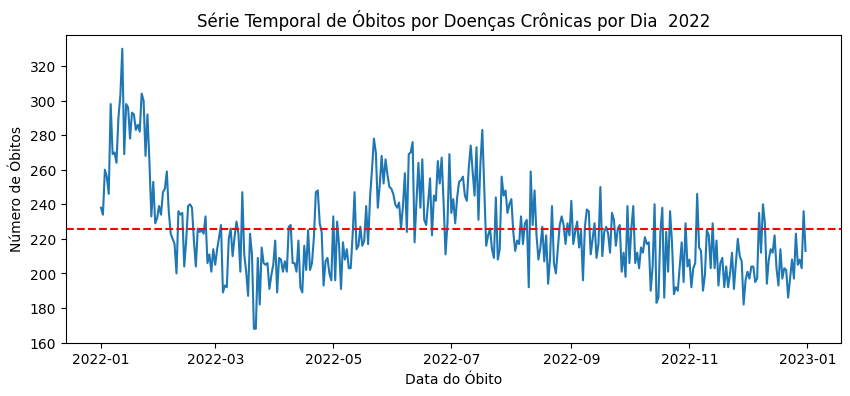

In [ ]:
df['dt_obito'] = pd.to_datetime(df['dt_obito'], format='%d/%m/%Y') #DEFININDO A VARIÁVEL dt-obito COM PADRÃO DATETIME


contagem_por_dia = df['dt_obito'].value_counts().sort_index() #FAZENDO A CONTAGEM DOS OBITOS


plt.figure(figsize=(10, 4))
sns.lineplot(x=contagem_por_dia.index, y=contagem_por_dia.values) #GRÁFICO DE LINHAS PARA CONTAGEM DE OBITOS
plt.axhline(y=contagem_por_dia.mean(), color='red', linestyle='--', label='Média de Óbitos por Dia') #CALCULANDO E PLOTANDO A LINHA DE MÉDIA DE OBITOS
plt.title('Série Temporal de Óbitos por Doenças Crônicas por Dia  2022')
plt.xlabel('Data do Óbito')
plt.ylabel('Número de Óbitos')
plt.show()

### OBITOS POR MÊS / 2022

---



In [ ]:
df['mes'] = df['dt_obito'].dt.to_period('M') #CONSULTANDO VALORES DE CONTAGEM DE OBITOS POR MÊS

contagem_por_mes = df['mes'].value_counts().sort_index()
contagem_por_mes

2022-01    8450
2022-02    6316
2022-03    6407
2022-04    6327
2022-05    7212
2022-06    7353
2022-07    7517
2022-08    6873
2022-09    6667
2022-10    6525
2022-11    6193
2022-12    6452
Freq: M, Name: mes, dtype: int64

In [ ]:
Média_Obitos_Mes = contagem_por_mes.mean() #CALCULANDO A MÉDIA DE OBITOS POR MÊS
print(Média_Obitos_Mes)

6857.666666666667


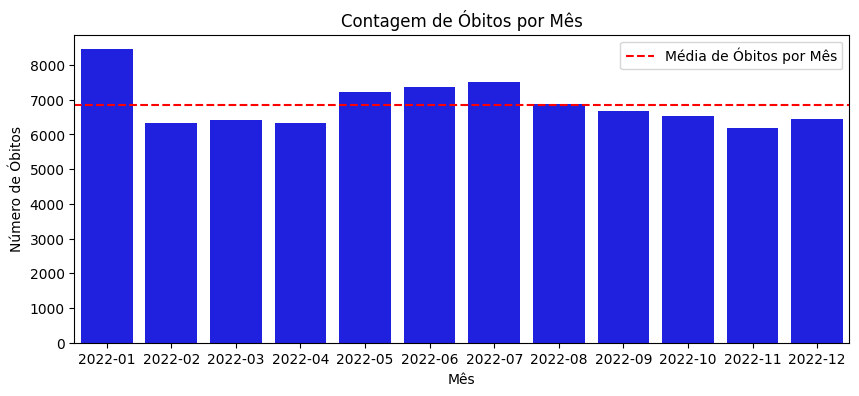

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=contagem_por_mes.index.astype(str), y=contagem_por_mes.values, color='blue')
plt.axhline(y=contagem_por_mes.mean(), color='red', linestyle='--', label='Média de Óbitos por Mês')
plt.title('Contagem de Óbitos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Óbitos')
plt.legend()
plt.show()

### GRÁFICOS

---



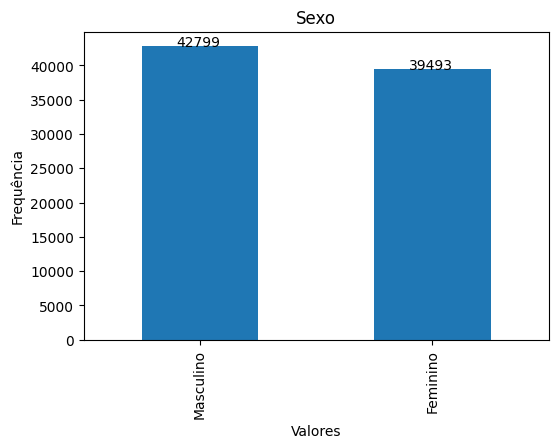

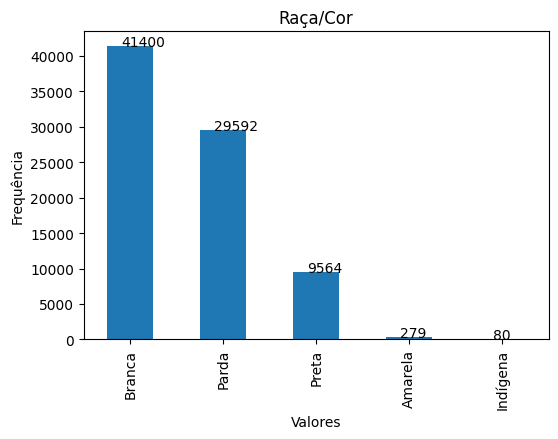

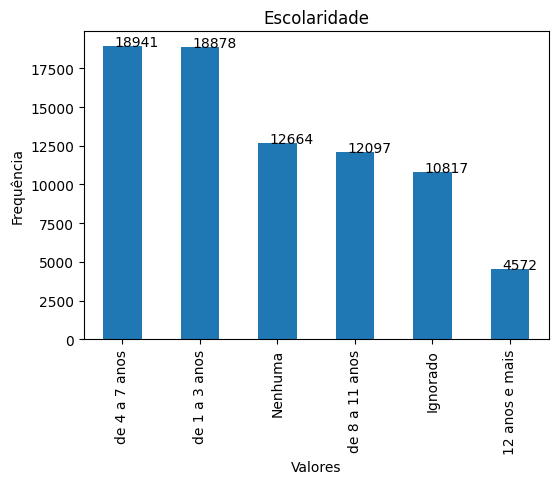

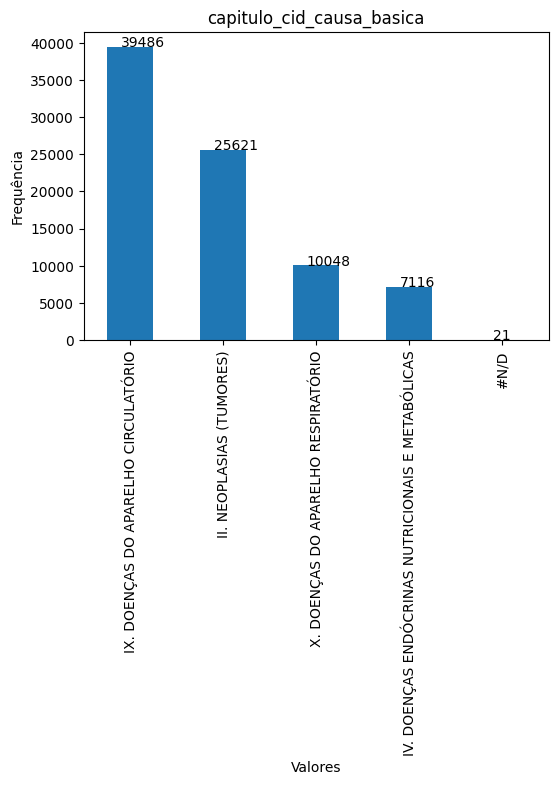

In [ ]:
plotar_colunas = [col for col in df1.columns if 1 < df1[col].nunique() <= 10] #DEFININDO COLUNAS COM VALORES ÚNICOS <= 10 PARA PLOTAR

for col in plotar_colunas:
    plt.figure(figsize=(6, 4))

    ax = df1[col].value_counts().plot(kind='bar') #CONTAGEM DO VALORES DE CADA COLUNA
    ax.set_title(col)
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frequência')

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.15, p.get_height()+0.5))
    plt.show()

### GRUPOS DE DOENÇAS :

---
Para fins de definição, as DCNT são divididas em 4 grandes grupos de doenças, considerando-se os códigos que constam na 10ª revisão da Classificação Internacional de Doenças (CID-10), listados a seguir:


In [ ]:
#CRINADO UM DICIONARIO CONTENDO OS GRUPOS DE DOENÇAS DEFINIDAS

grupos_doencas = {
    'Neoplasias': ['C00', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97'],
    'Diabetes': ['E10', 'E11', 'E12', 'E13', 'E14'],
    'Doenças Cardiovasculares': ['I00', 'I01', 'I02', 'I03', 'I04', 'I05', 'I06', 'I07', 'I08', 'I09', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19', 'I20', 'I21', 'I22', 'I23', 'I24', 'I25', 'I26', 'I27', 'I28', 'I29', 'I30', 'I31', 'I32', 'I33', 'I34', 'I35', 'I36', 'I37', 'I38', 'I39', 'I40', 'I41', 'I42', 'I43', 'I44', 'I45', 'I46', 'I47', 'I48', 'I49', 'I50', 'I51', 'I52', 'I53', 'I54', 'I55', 'I56', 'I57', 'I58', 'I59', 'I60', 'I61', 'I62', 'I63', 'I64', 'I65', 'I66', 'I67', 'I68', 'I69', 'I70', 'I71', 'I72', 'I73', 'I74', 'I75', 'I76', 'I77', 'I78', 'I79', 'I80', 'I81', 'I82', 'I83', 'I84', 'I85', 'I86', 'I87', 'I88', 'I89', 'I90', 'I91', 'I92', 'I93', 'I94', 'I95', 'I96', 'I97', 'I98', 'I99'],
    'Doenças Respiratórias Crônicas': ['J30', 'J31', 'J32', 'J33', 'J34', 'J35', 'J36', 'J37', 'J38', 'J39', 'J40', 'J41', 'J42', 'J43', 'J44', 'J45', 'J46', 'J47', 'J60', 'J61', 'J62', 'J63', 'J64', 'J65', 'J66', 'J67', 'J68', 'J69', 'J70', 'J80', 'J81', 'J82', 'J84', 'J85', 'J86', 'J90', 'J91', 'J92', 'J93', 'J94', 'J95', 'J96', 'J98']
}

In [ ]:
contagem_doencas = {} #DICIONARIO VAZIO PARA ARMZENAR A CONTAGEM DOS GRUPOS DE DOENÇAS

for nome_grupo, codigos_grupo in grupos_doencas.items():
    contagem = df1[df1['co_cid_causa_basica'].str.startswith(tuple(codigos_grupo))]['co_cid_causa_basica'].count() #VARIAVEL CONTENDO  A CONTAGEM DOS GRUPOS
    contagem_doencas[nome_grupo] = contagem

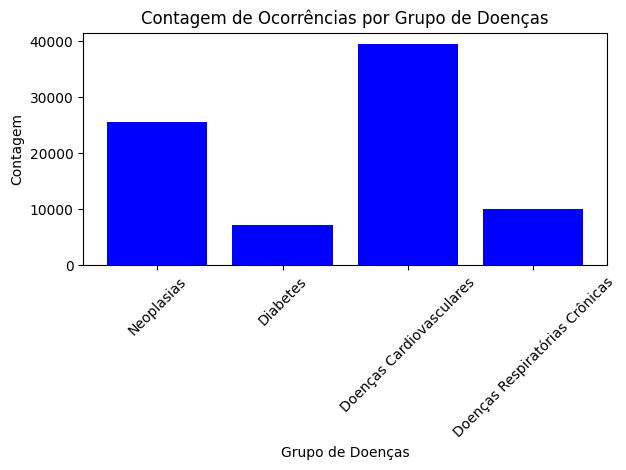

In [ ]:
plt.bar(contagem_doencas.keys(), contagem_doencas.values(), color='blue')


plt.title('Contagem de Ocorrências por Grupo de Doenças')
plt.xlabel('Grupo de Doenças')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

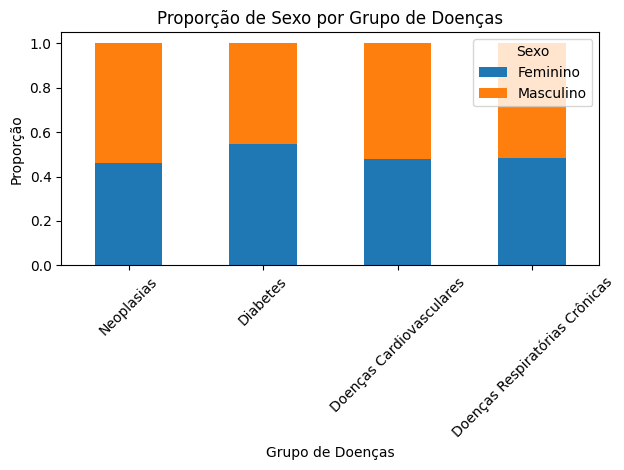

In [ ]:
contagem_sexo_grupo = {}


for nome_grupo, codigos_grupo in grupos_doencas.items():

    df_grupo = df1[df1['co_cid_causa_basica'].str.startswith(tuple(codigos_grupo))]
    contagem_sexo = df_grupo['Sexo'].value_counts()
    contagem_sexo_grupo[nome_grupo] = contagem_sexo


df_contagem_sexo_grupo = pd.DataFrame(contagem_sexo_grupo).T
proporcao_sexo_grupo = df_contagem_sexo_grupo.div(df_contagem_sexo_grupo.sum(axis=1), axis=0)


proporcao_sexo_grupo.plot(kind='bar', stacked=True)

plt.title('Proporção de Sexo por Grupo de Doenças')
plt.xlabel('Grupo de Doenças')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

### DESCRIÇÃO DA CAUSA BÁSICA

---
Contagem de Ocorrências por Capitulo Causa Básica


In [ ]:
desc = df1['capitulo_cid_causa_basica'].value_counts() #CONTAGEM DOS VALORES DA VARIAVEL CAUSA BASICA
desc

IX. DOENÇAS DO APARELHO CIRCULATÓRIO                 39486
II. NEOPLASIAS (TUMORES)                             25621
X. DOENÇAS DO APARELHO RESPIRATÓRIO                  10048
IV. DOENÇAS ENDÓCRINAS NUTRICIONAIS E METABÓLICAS     7116
#N/D                                                    21
Name: capitulo_cid_causa_basica, dtype: int64

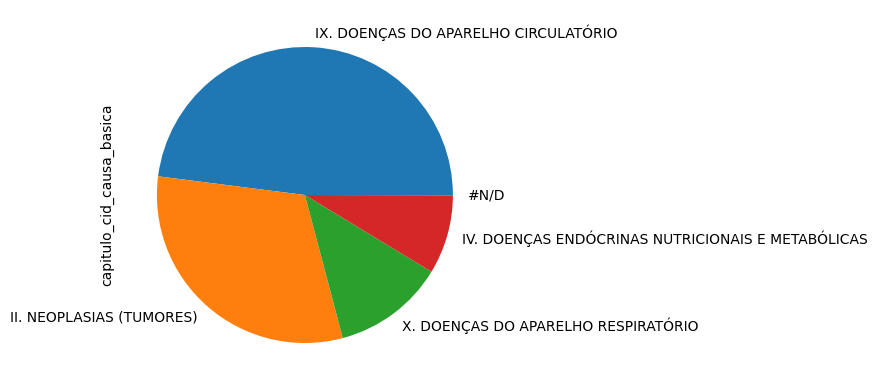

In [ ]:
desc.plot(kind = 'pie' , figsize= (10, 4))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Top 10 Causa Baásica de Ocorrências por Descrição

---



In [ ]:
desc1 = df1['desc_cid_causa_basica'].value_counts().head(10)
desc1

INFARTO AGUDO DO MIOCARDIO NE                   7057
HIPERTENSAO ESSENCIAL                           6155
ACID VASC CEREBR NE COMO HEMORRAG ISQUEMICO     4218
S/COMPLIC                                       4058
BRONQUIOS OU PULMOES NE                         2697
INSUF CARDIACA NE                               2674
DOENC PULMONAR OBSTRUTIVA CRONICA NE            2583
OUTR DOENC CEREBROVASCULARES ESPEC              1846
DOEN PULM OBS CRON C/INF RESP AG TR RESP INF    1807
NEOPL MALIG DA PROSTATA                         1705
Name: desc_cid_causa_basica, dtype: int64

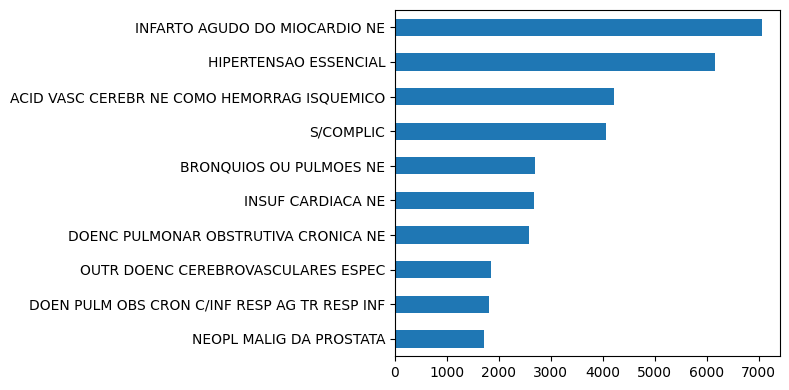

In [ ]:
desc1 = desc1.sort_values(ascending= True)
desc1.plot(kind='barh', figsize=(8, 4))

plt.tight_layout()
plt.show()

### ANÁLISE DA IDADE DOS PACIENTES

---



In [ ]:
from tabulate import tabulate

desc_stats = df1['Idade'].describe()
desc_stats_df = desc_stats.to_frame().reset_index()
desc_stats_df.columns = ['Estatística', 'Valor']


table = tabulate(desc_stats_df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)

╒═══════════════╤════════════╕
│ Estatística   │      Valor │
╞═══════════════╪════════════╡
│ count         │ 82284      │
├───────────────┼────────────┤
│ mean          │    71.7423 │
├───────────────┼────────────┤
│ std           │    15.1987 │
├───────────────┼────────────┤
│ min           │     0      │
├───────────────┼────────────┤
│ 25%           │    63      │
├───────────────┼────────────┤
│ 50%           │    73      │
├───────────────┼────────────┤
│ 75%           │    83      │
├───────────────┼────────────┤
│ max           │   117      │
╘═══════════════╧════════════╛


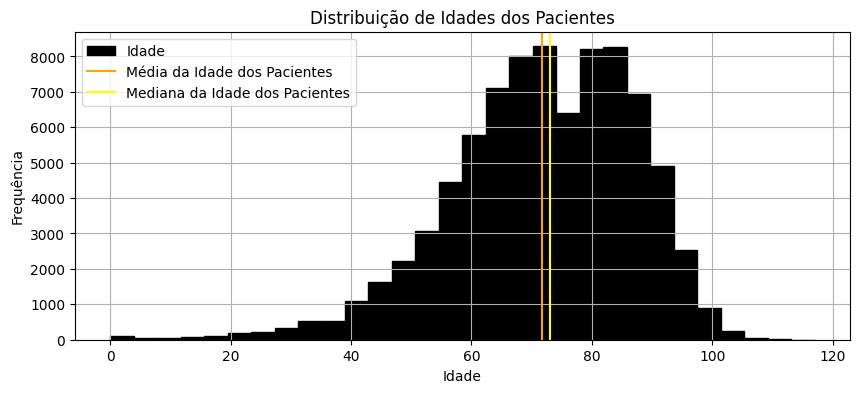

In [ ]:
ax = df1['Idade'].plot(kind='hist', bins=30, color='black',  edgecolor='black' ,figsize=(10, 4))

ax.axvline(df1['Idade'].mean() , color = 'orange' , label='Média da Idade dos Pacientes')
ax.axvline(df1['Idade'].median() , color = 'yellow' , label='Mediana da Idade dos Pacientes')

plt.title('Distribuição de Idades dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.legend()
plt.show()

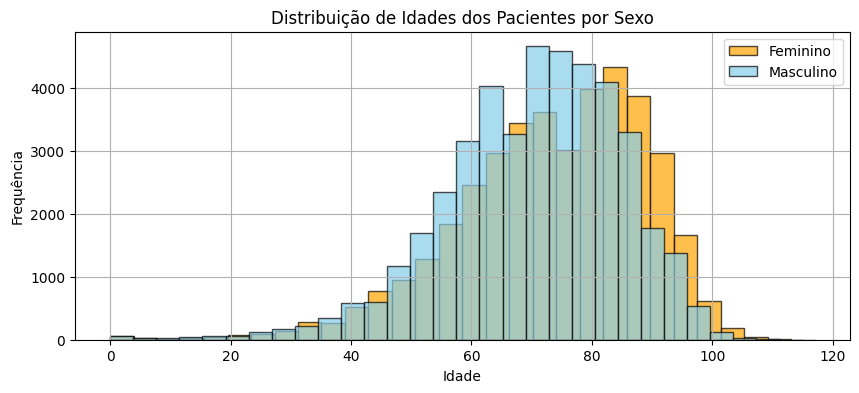

In [ ]:
idade_feminino = df1[df1['Sexo'] == 'Feminino']['Idade']
idade_masculino = df1[df1['Sexo'] == 'Masculino']['Idade']


plt.figure(figsize=(10, 4))

plt.hist(idade_feminino, bins=30, color='orange', alpha=0.7, edgecolor='black', label='Feminino')
plt.hist(idade_masculino, bins=30, color='skyblue', alpha=0.7, edgecolor='black', label='Masculino')


plt.title('Distribuição de Idades dos Pacientes por Sexo')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.legend()


plt.show()


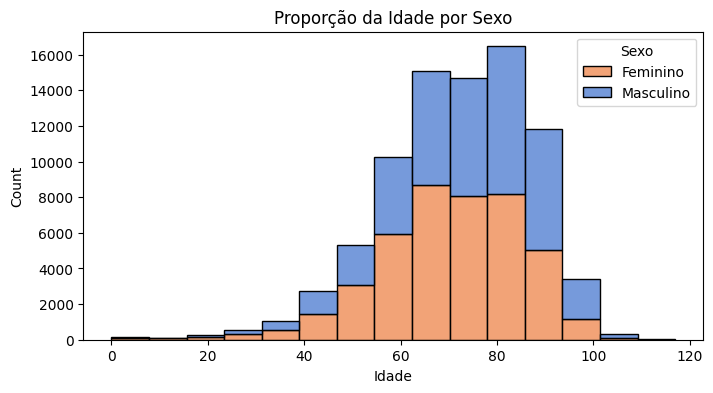

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(x='Idade', hue='Sexo', data=df1, palette='muted', multiple='stack', bins=15)

plt.title('Proporção da Idade por Sexo')
plt.xlabel('Idade')
plt.ylabel('Count')
plt.legend(title='Sexo', labels=['Feminino', 'Masculino'])
plt.show()

### CAUSA DO ÓBITO

---



In [ ]:
causa = df['categoria_cid_causa_basica'].value_counts()
display(causa)

INFARTO AGUDO DO MIOCARDIO                      7209
HIPERTENSAO ESSENCIAL                           6155
DIABETES MELLITUS NE                            5384
OUTR DOENC PULMONARES OBSTRUTIVAS CRONICAS      5326
INSUF CARDIACA                                  4585
ACID VASC CEREBR NE COMO HEMORRAG ISQUEMICO     4218
NEOPL MALIG DOS BRONQUIOS E DOS PULMOES         2825
OUTR DOENC CEREBROVASCULARES                    2012
NEOPL MALIG DA MAMA                             1846
NEOPL MALIG DA PROSTATA                         1705
SEQUELAS DE DOENC CEREBROVASCULARES             1619
NEOPL MALIG DO ESTOMAGO                         1530
HEMORRAGIA INTRACEREBRAL                        1516
DOENC CARDIACA HIPERTENSIVA                     1500
PNEUMONITE DEV SOLIDOS E LIQUIDOS               1434
NEOPL MALIG DO COLON                            1417
NEOPL MALIG DO PANCREAS                         1298
NEOPL MALIG DO ESOFAGO                          1285
DOENC ISQUEMICA CRONICA DO CORACAO            

### TOP 10 CAUSA BÁSICA DA MORTE POR SEXO

---



In [ ]:
tab = pd.crosstab(df1['categoria_cid_causa_basica'], df1['Sexo'])
top_10_causas = tab.sort_values(by='Feminino', ascending=False).head(10)

display(top_10_causas)

Sexo,Feminino,Masculino
categoria_cid_causa_basica,,
HIPERTENSAO ESSENCIAL,3177,2978
DIABETES MELLITUS NE,2954,2430
INFARTO AGUDO DO MIOCARDIO,2837,4372
OUTR DOENC PULMONARES OBSTRUTIVAS CRONICAS,2518,2808
INSUF CARDIACA,2490,2095
ACID VASC CEREBR NE COMO HEMORRAG ISQUEMICO,2056,2162
NEOPL MALIG DA MAMA,1824,22
NEOPL MALIG DOS BRONQUIOS E DOS PULMOES,1221,1604
OUTR DOENC CEREBROVASCULARES,1010,1002


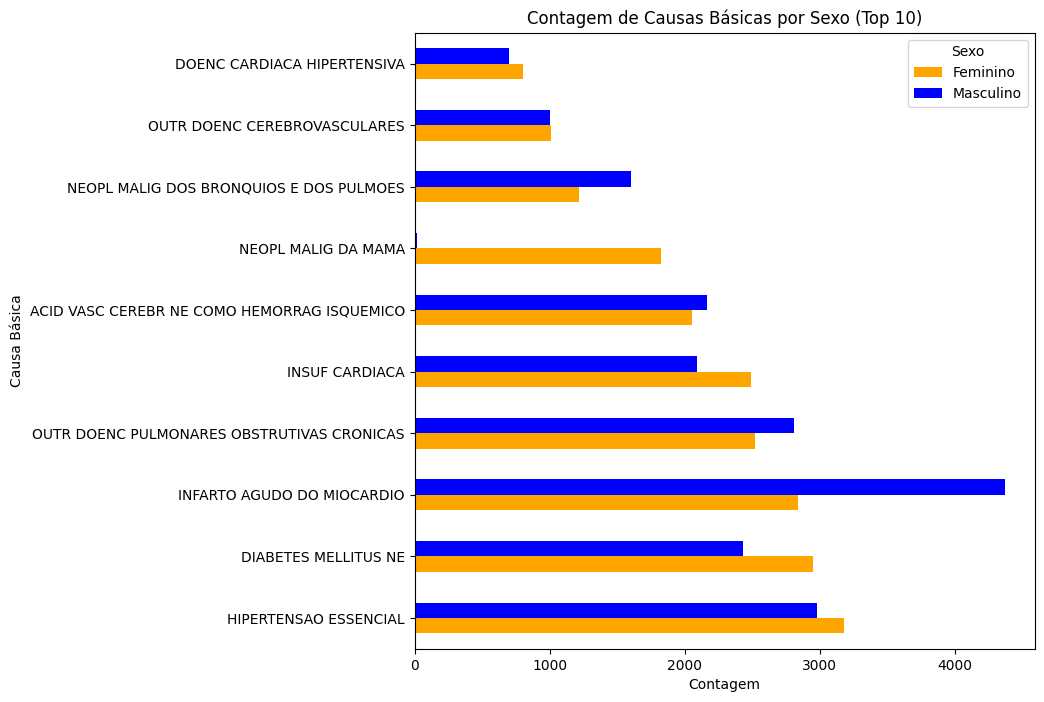

In [ ]:
cores = {'Feminino': 'orange', 'Masculino': 'blue'}

top_10_causas.plot(kind='barh', figsize=(8, 8), color= cores)

plt.title('Contagem de Causas Básicas por Sexo (Top 10)')
plt.xlabel('Contagem')
plt.ylabel('Causa Básica')
plt.legend(title='Sexo', loc='upper right')
plt.show()

### ESCOLARIDADE POR SEXO

---



In [ ]:
tab1 = pd.crosstab(df1['Escolaridade'], df1['Sexo'])
tab1 = tab1.sort_values(by='Feminino', ascending=False)

display(tab1)

Sexo,Feminino,Masculino
Escolaridade,,
de 1 a 3 anos,8950,9928
de 4 a 7 anos,8361,10580
Nenhuma,7252,5412
de 8 a 11 anos,5524,6573
Ignorado,5068,5749
12 anos e mais,2297,2275


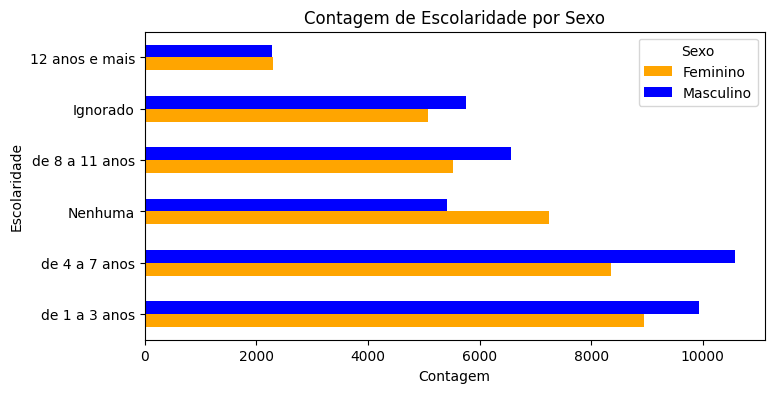

In [ ]:
tab1.plot(kind='barh' , figsize=(8, 4) , color= cores)

plt.title('Contagem de Escolaridade por Sexo')
plt.xlabel('Contagem')
plt.ylabel('Escolaridade')
plt.legend(title='Sexo', loc='upper right')
plt.show()

### RAÇA / SEXO

---



In [ ]:
tab2 = pd.crosstab(df1['Raça/Cor'], df1['Sexo'])
tab2 = tab2.sort_values(by='Feminino', ascending=False)

display(tab2)

Sexo,Feminino,Masculino
Raça/Cor,,
Branca,20674,20726
Parda,13612,15980
Preta,4390,5174
Amarela,135,144
Indígena,46,34


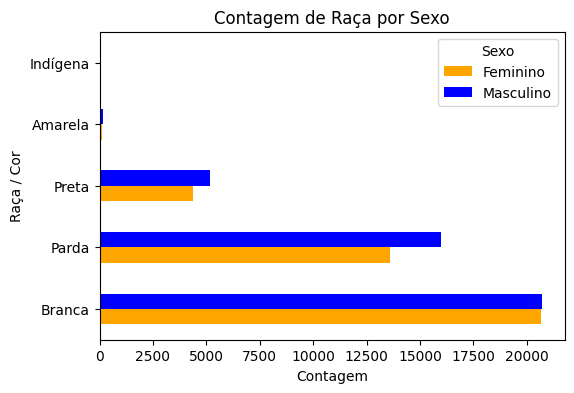

In [ ]:
tab2.plot(kind='barh' , figsize=(6, 4), color = cores)

plt.title('Contagem de Raça por Sexo')
plt.xlabel('Contagem')
plt.ylabel('Raça / Cor')
plt.legend(title='Sexo', loc='upper right')
plt.show()

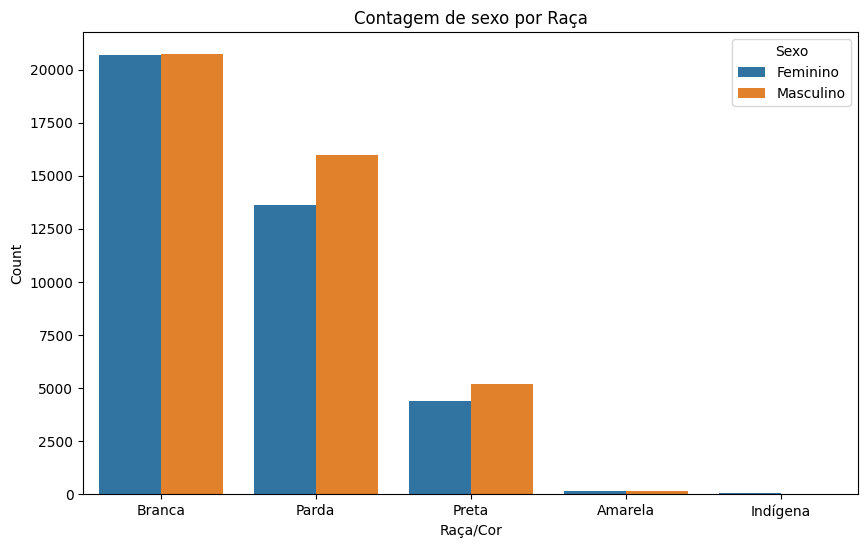

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x= 'Raça/Cor', hue= 'Sexo', data=df1)
plt.title('Contagem de sexo por Raça')
plt.xlabel('Raça/Cor')
plt.ylabel('Count')
plt.legend(title='Sexo', labels=['Feminino', 'Masculino'])
plt.show()